In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl/matches.csv
/kaggle/input/ipl/deliveries.csv


In [2]:
matches = pd.read_csv('/kaggle/input/ipl/matches.csv')
delivery = pd.read_csv('/kaggle/input/ipl/deliveries.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**most wins in ipl**

In [5]:
wins = matches['winner'].value_counts().reset_index()
wins

,index,winner
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Gujarat Lions,13


**Most matches played by a team**

In [6]:
totalmatches = (matches['team1'].value_counts() + matches['team2'].value_counts()).sort_values(ascending = False).reset_index()
totalmatches.rename(columns = {"0":"total"}) 


,index,0
0,Mumbai Indians,157
1,Royal Challengers Bangalore,152
2,Kings XI Punjab,148
3,Kolkata Knight Riders,148
4,Delhi Daredevils,147
5,Chennai Super Kings,131
6,Rajasthan Royals,118
7,Sunrisers Hyderabad,76
8,Deccan Chargers,75
9,Pune Warriors,46


**outcome of games**

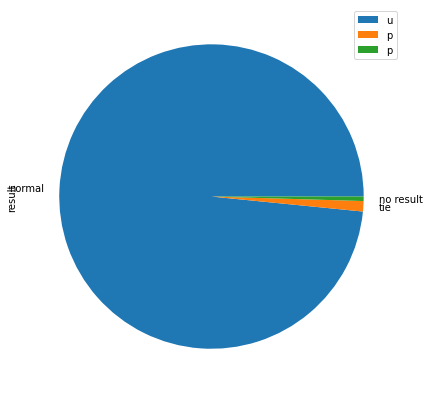

In [7]:
plt.figure(figsize = (7,7))
matches.result.value_counts().plot(kind='pie')
plt.legend('upper right')

In [8]:
#for i in range(1,wins.shape[0]):
 #   if wins.index == totalmatches.index:
  #      winner/
    

**Most MOM awards in IPL**

In [9]:
matches['player_of_match'].value_counts().head()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
Name: player_of_match, dtype: int64

**Most games Umpired**

In [10]:
matchesUmpired = (matches['umpire1'].value_counts() + matches['umpire2'].value_counts()).sort_values(ascending = False).head().reset_index()
matchesUmpired

,index,0
0,HDPK Dharmasena,87.0
1,S Ravi,85.0
2,AK Chaudhary,58.0
3,C Shamshuddin,56.0
4,SJA Taufel,55.0


**Venue With Most Games**

<AxesSubplot:>

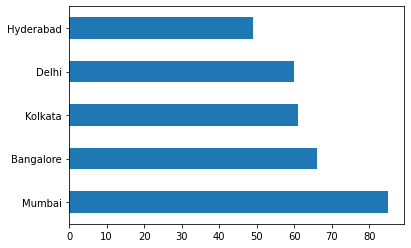

In [11]:
city = matches['city'].value_counts().head()
city.plot(kind='barh')

In [12]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Teams wins against toss result**

In [13]:
toss_result = matches.groupby('toss_decision')
toss_result['winner'].value_counts()

toss_decision  winner                     
bat            Chennai Super Kings            50
               Mumbai Indians                 41
               Kolkata Knight Riders          34
               Rajasthan Royals               30
               Delhi Daredevils               28
               Royal Challengers Bangalore    26
               Kings XI Punjab                20
               Sunrisers Hyderabad            16
               Deccan Chargers                14
               Pune Warriors                   9
               Gujarat Lions                   2
               Rising Pune Supergiants         2
field          Mumbai Indians                 51
               Kings XI Punjab                50
               Royal Challengers Bangalore    47
               Kolkata Knight Riders          43
               Delhi Daredevils               34
               Rajasthan Royals               33
               Chennai Super Kings            29
               Sunrisers H

In [14]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [16]:
delivery['player_dismissed'].unique()

array([nan, 'DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head', 'Sachin Baby',
       'STR Binny', 'SR Watson', 'S Aravind', 'TS Mills', 'YS Chahal',
       'PA Patel', 'RG Sharma', 'JC Buttler', 'AT Rayudu', 'KH Pandya',
       'N Rana', 'KA Pollard', 'TG Southee', 'MA Agarwal', 'AM Rahane',
       'BA Stokes', 'JJ Roy', 'BB McCullum', 'AJ Finch', 'KD Karthik',
       'SPD Smith', 'MS Dhoni', 'DT Christian', 'M Vohra', 'WP Saha',
       'HM Amla', 'AR Patel', 'Vishnu Vinod', 'P Negi', 'AP Tare',
       'KK Nair', 'SW Billings', 'SV Samson', 'CH Morris',
       'CR Brathwaite', 'PJ Cummins', 'RR Pant', 'S Nadeem', 'SK Raina',
       'DR Smith', 'DS Kulkarni', 'G Gambhir', 'RV Uthappa', 'CA Lynn',
       'YK Pathan', 'SA Yadav', 'CR Woakes', 'SP Narine', 'RA Tripathi',
       'F du Plessis', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda',
       'DJ Hooda', 'BCJ Cutting', 'V Shankar', 'NV Ojha', 'Rashid Khan',
       'MP S

**Batsman bowled by a particular bowler**

In [17]:
playerdismiss=delivery[delivery['dismissal_kind'].notnull()]
bowled = playerdismiss[playerdismiss['dismissal_kind'] == 'bowled']
bowled.groupby(['batsman','bowler'])['dismissal_kind'].count().sort_values(ascending = False).reset_index().head()

,batsman,bowler,dismissal_kind
0,SR Watson,AR Patel,3
1,S Dhawan,SL Malinga,3
2,V Kohli,PP Chawla,3
3,GJ Maxwell,JJ Bumrah,3
4,CH Gayle,DS Kulkarni,3


In [18]:
delivery['dismissal_kind'].value_counts() 

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: dismissal_kind, dtype: int64

In [19]:
delivery['fielder'].count() #4373+755+243+1+211=5583

5369

**Most Caught&Bowled by a bowler**

In [20]:
mostC_B=delivery[delivery['dismissal_kind'] =='caught and bowled']
mostC_B['bowler'].value_counts().head()

Harbhajan Singh    10
DJ Bravo            8
SP Narine           7
KA Pollard          6
A Chandila          5
Name: bowler, dtype: int64

**Most catches by a fielder**

In [21]:
mostcatches = delivery[delivery['dismissal_kind'] =='caught']
mostcatches['fielder'].value_counts().head()

KD Karthik        88
SK Raina          83
AB de Villiers    81
MS Dhoni          76
RV Uthappa        75
Name: fielder, dtype: int64

In [22]:
print(delivery.shape) #150460
delivery.isna().sum() #145091

(150460, 21)


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [23]:
delivery.drop(columns = ['player_dismissed','dismissal_kind','fielder'])

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1


**Most IPL runs & their team**

<AxesSubplot:xlabel='batsman,batting_team'>

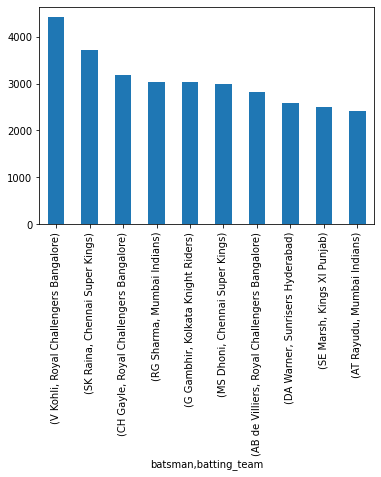

In [24]:
delivery.groupby(['batsman','batting_team'])['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind='bar')

**Batsman with Most Dot Balls in IPL**

In [25]:
#delivery.groupby('batsman')['ball'].sum().sort_values(ascending = False).head()
dotballs = delivery[delivery['batsman_runs'] == 0]
dotballs.groupby('batsman')['ball'].count().sort_values(ascending = False).head()

batsman
G Gambhir    1318
V Kohli      1287
S Dhawan     1210
RG Sharma    1185
CH Gayle     1178
Name: ball, dtype: int64

**Most Balls Faced in IPL**

In [26]:
delivery.groupby('batsman')['ball'].count().sort_values(ascending = False).head()

batsman
V Kohli      3494
G Gambhir    3433
SK Raina     3369
RG Sharma    3274
S Dhawan     3005
Name: ball, dtype: int64

**Most Sixes in IPL**

<AxesSubplot:xlabel='batsman'>

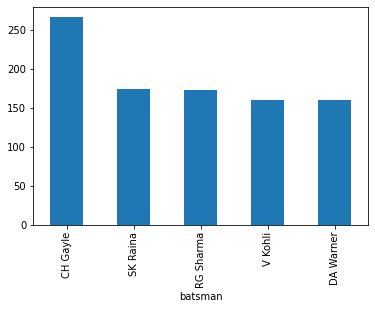

In [27]:
sixes = delivery[delivery['batsman_runs'] == 6]
sixes.groupby('batsman')['ball'].count().sort_values(ascending = False).head().plot(kind = 'bar')

****Most runs scored against any opponent for Virat Kohli ******

In [28]:
vkdata = delivery[delivery['batsman'] == 'V Kohli']
vkdata.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending = False).head()

bowling_team
Chennai Super Kings    706
Delhi Daredevils       661
Kings XI Punjab        483
Mumbai Indians         447
Sunrisers Hyderabad    439
Name: batsman_runs, dtype: int64

**Most Extras given by a bowler**

In [29]:
delivery.groupby('bowler')['extra_runs'].sum().sort_values(ascending = False).head()

bowler
SL Malinga    268
P Kumar       236
UT Yadav      186
RP Singh      181
Z Khan        169
Name: extra_runs, dtype: int64

In [30]:
delivery.drop(columns = ['player_dismissed','dismissal_kind','fielder'])

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1


In [31]:
delivery['is_super_over'].unique()

array([0, 1])

In [33]:
superover = delivery[delivery['is_super_over'] == 1]
superover.groupby('bowling_team')['bowler'].value_counts()

bowling_team                 bowler        
Chennai Super Kings          M Muralitharan    4
Delhi Daredevils             UT Yadav          6
Gujarat Lions                JP Faulkner       5
Kings XI Punjab              J Theron          5
                             MG Johnson        4
Kolkata Knight Riders        SP Narine         6
                             BAW Mendis        4
Mumbai Indians               JJ Bumrah         8
Rajasthan Royals             CH Morris         7
                             Kamran Khan       7
                             JP Faulkner       6
Royal Challengers Bangalore  R Vinay Kumar     7
                             R Rampaul         6
Sunrisers Hyderabad          DW Steyn          6
Name: bowler, dtype: int64